In [1]:
from Model.DCVAE import MobileNetVae
from Model.Utils import PlotHistory, PlotDataAE, Save_Model
from Model.Utils import load_from_tfrecords, convert_to_tfrecords, load_numpy
from keras.optimizers import RMSprop,Adam
import numpy as np
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS100'
path_npy = '/share/GeoFacies/DataSet/MPS100/MPS100.npy'
batch_size = 32

In [3]:
if load_tfrecords:
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr, x_train, x_test)
        gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
    else:
        try:
            gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
else:
    x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)

# Create Convolutional Variational Autoencoder

In [4]:
path_weights = os.path.join(path_tfr, 'w100_Mob.hdf5')

model = MobileNetVae(input_shape=(100, 100, 2),filters=[32,32,16],strides=[2,2,1],
                     latent_dim=500,opt=Adam(lr=0.001),dropout=0.0, filepath=path_weights) #Adam(amsgrad=True)

# Training Network

In [5]:
num_epochs = 500

if load_tfrecords:
    x_train = gen_train.mps_generator()
    x_val = gen_test.mps_generator()
    model.fit_generator(x_train,
                        num_epochs=num_epochs, verbose=1, 
                        steps_per_epoch = len(gen_train),
                        val_set = x_val,
                        validation_steps = len(gen_test))
else:
    model.fit(x_train, num_epochs=num_epochs, batch_size = batch_size, x_v=x_test,verbose=1) 

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 2)  0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 50, 50, 64)   1152        input_1[0][0]                    
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 50, 50, 64)   256         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 50, 50, 64)   0           Conv_BN[0][0]                    
_________________________________________________________________________________________

Instructions for updating:
Use tf.cast instead.


Epoch 1/500


875/875 [==============================] - 124s 142ms/step - loss: 4419.3235 - acc_pred: 0.7889 - val_loss: 47190.4386 - val_acc_pred: 0.6798
Epoch 2/500


875/875 [==============================] - 105s 121ms/step - loss: 3121.0485 - acc_pred: 0.8730 - val_loss: 38389.9207 - val_acc_pred: 0.7000
Epoch 3/500


875/875 [==============================] - 105s 120ms/step - loss: 2827.1972 - acc_pred: 0.8888 - val_loss: 36453.9704 - val_acc_pred: 0.7162
Epoch 4/500


875/875 [==============================] - 105s 120ms/step - loss: 2676.2968 - acc_pred: 0.8965 - val_loss: 31744.2098 - val_acc_pred: 0.7282
Epoch 5/500


875/875 [==============================] - 106s 121ms/step - loss: 2561.0141 - acc_pred: 0.9021 - val_loss: 28800.7693 - val_acc_pred: 0.7331
Epoch 6/500


875/875 [==============================] - 105s 120ms/step - loss: 2466.1658 - acc_pred: 0.9063 - val_loss: 40068.3703 - val_acc_pred: 0.7037
Epoch 7/500


875/875 [==============================] - 105s 120ms/step - loss: 2387.1700 - acc_pred: 0.9096 - val_loss: 35328.0089 - val_acc_pred: 0.7118
Epoch 8/500


875/875 [==============================] - 105s 120ms/step - loss: 2304.4975 - acc_pred: 0.9131 - val_loss: 31513.4195 - val_acc_pred: 0.7204
Epoch 9/500


875/875 [==============================] - 104s 119ms/step - loss: 2234.6570 - acc_pred: 0.9160 - val_loss: 37626.4623 - val_acc_pred: 0.7011
Epoch 10/500


875/875 [==============================] - 104s 119ms/step - loss: 2181.3401 - acc_pred: 0.9180 - val_loss: 49701.7376 - val_acc_pred: 0.6679

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 11/500


875/875 [==============================] - 104s 119ms/step - loss: 2088.4809 - acc_pred: 0.9220 - val_loss: 13908.5541 - val_acc_pred: 0.7776
Epoch 12/500


875/875 [==============================] - 104s 119ms/step - loss: 2065.9420 - acc_pred: 0.9228 - val_loss: 7583.4837 - val_acc_pred: 0.8228
Epoch 13/500


875/875 [==============================] - 104s 119ms/step - loss: 2038.9772 - acc_pred: 0.9238 - val_loss: 4187.7944 - val_acc_pred: 0.8700
Epoch 14/500


875/875 [==============================] - 104s 119ms/step - loss: 2023.1793 - acc_pred: 0.9244 - val_loss: 7435.7719 - val_acc_pred: 0.8267
Epoch 15/500


875/875 [==============================] - 104s 119ms/step - loss: 2008.1853 - acc_pred: 0.9249 - val_loss: 4779.0906 - val_acc_pred: 0.8603
Epoch 16/500


875/875 [==============================] - 104s 118ms/step - loss: 1990.6253 - acc_pred: 0.9256 - val_loss: 4199.8465 - val_acc_pred: 0.8717
Epoch 17/500


875/875 [==============================] - 103s 118ms/step - loss: 1975.8378 - acc_pred: 0.9261 - val_loss: 3266.3842 - val_acc_pred: 0.8900
Epoch 18/500


875/875 [==============================] - 103s 118ms/step - loss: 1960.2578 - acc_pred: 0.9267 - val_loss: 3402.1641 - val_acc_pred: 0.8879
Epoch 19/500


875/875 [==============================] - 104s 119ms/step - loss: 1943.8200 - acc_pred: 0.9274 - val_loss: 4599.7286 - val_acc_pred: 0.8648
Epoch 20/500


875/875 [==============================] - 103s 118ms/step - loss: 1932.8768 - acc_pred: 0.9279 - val_loss: 3730.6980 - val_acc_pred: 0.8835
Epoch 21/500


875/875 [==============================] - 104s 119ms/step - loss: 1921.7510 - acc_pred: 0.9283 - val_loss: 3187.3883 - val_acc_pred: 0.8920
Epoch 22/500


875/875 [==============================] - 104s 119ms/step - loss: 1911.6208 - acc_pred: 0.9287 - val_loss: 4127.9231 - val_acc_pred: 0.8732
Epoch 23/500


875/875 [==============================] - 104s 118ms/step - loss: 1906.6946 - acc_pred: 0.9288 - val_loss: 2778.2762 - val_acc_pred: 0.9047
Epoch 24/500


875/875 [==============================] - 103s 118ms/step - loss: 1901.2341 - acc_pred: 0.9290 - val_loss: 3396.7189 - val_acc_pred: 0.8877
Epoch 25/500


875/875 [==============================] - 104s 118ms/step - loss: 1891.2002 - acc_pred: 0.9294 - val_loss: 3761.4047 - val_acc_pred: 0.8804
Epoch 26/500


875/875 [==============================] - 103s 118ms/step - loss: 1885.6279 - acc_pred: 0.9296 - val_loss: 2960.7456 - val_acc_pred: 0.8980
Epoch 27/500


875/875 [==============================] - 103s 118ms/step - loss: 1878.5796 - acc_pred: 0.9298 - val_loss: 2742.4952 - val_acc_pred: 0.9026
Epoch 28/500


875/875 [==============================] - 103s 118ms/step - loss: 1871.3529 - acc_pred: 0.9301 - val_loss: 2595.4126 - val_acc_pred: 0.9081
Epoch 29/500


875/875 [==============================] - 104s 119ms/step - loss: 1863.9131 - acc_pred: 0.9304 - val_loss: 2931.2362 - val_acc_pred: 0.9012
Epoch 30/500


875/875 [==============================] - 104s 118ms/step - loss: 1855.9173 - acc_pred: 0.9307 - val_loss: 3843.3705 - val_acc_pred: 0.8813
Epoch 31/500


875/875 [==============================] - 103s 118ms/step - loss: 1847.1338 - acc_pred: 0.9311 - val_loss: 3755.7567 - val_acc_pred: 0.8838
Epoch 32/500


875/875 [==============================] - 104s 118ms/step - loss: 1840.4448 - acc_pred: 0.9314 - val_loss: 2636.1302 - val_acc_pred: 0.9088
Epoch 33/500


875/875 [==============================] - 104s 119ms/step - loss: 1833.2370 - acc_pred: 0.9317 - val_loss: 2829.8535 - val_acc_pred: 0.9038

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 34/500


875/875 [==============================] - 103s 118ms/step - loss: 1805.5174 - acc_pred: 0.9329 - val_loss: 2016.5064 - val_acc_pred: 0.9256
Epoch 35/500


875/875 [==============================] - 104s 119ms/step - loss: 1799.5186 - acc_pred: 0.9332 - val_loss: 2006.7109 - val_acc_pred: 0.9263
Epoch 36/500


875/875 [==============================] - 104s 118ms/step - loss: 1787.8726 - acc_pred: 0.9336 - val_loss: 2027.6706 - val_acc_pred: 0.9241
Epoch 37/500


875/875 [==============================] - 103s 118ms/step - loss: 1785.7566 - acc_pred: 0.9337 - val_loss: 1976.0755 - val_acc_pred: 0.9265
Epoch 38/500


875/875 [==============================] - 103s 118ms/step - loss: 1784.2139 - acc_pred: 0.9337 - val_loss: 1876.4176 - val_acc_pred: 0.9303
Epoch 39/500


875/875 [==============================] - 104s 119ms/step - loss: 1780.5258 - acc_pred: 0.9339 - val_loss: 1968.4157 - val_acc_pred: 0.9255
Epoch 40/500


875/875 [==============================] - 103s 118ms/step - loss: 1778.3344 - acc_pred: 0.9340 - val_loss: 1951.9478 - val_acc_pred: 0.9263
Epoch 41/500


875/875 [==============================] - 104s 119ms/step - loss: 1776.9213 - acc_pred: 0.9340 - val_loss: 1908.5805 - val_acc_pred: 0.9297
Epoch 42/500


875/875 [==============================] - 104s 119ms/step - loss: 1774.2669 - acc_pred: 0.9341 - val_loss: 1938.7746 - val_acc_pred: 0.9279
Epoch 43/500


875/875 [==============================] - 103s 118ms/step - loss: 1771.9887 - acc_pred: 0.9342 - val_loss: 1994.1651 - val_acc_pred: 0.9267

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 44/500


875/875 [==============================] - 104s 119ms/step - loss: 1758.6149 - acc_pred: 0.9348 - val_loss: 1770.3515 - val_acc_pred: 0.9351
Epoch 45/500


875/875 [==============================] - 104s 119ms/step - loss: 1754.6501 - acc_pred: 0.9349 - val_loss: 1787.5571 - val_acc_pred: 0.9344
Epoch 46/500


875/875 [==============================] - 104s 119ms/step - loss: 1750.3480 - acc_pred: 0.9351 - val_loss: 1783.6889 - val_acc_pred: 0.9341
Epoch 47/500


875/875 [==============================] - 104s 119ms/step - loss: 1749.0479 - acc_pred: 0.9352 - val_loss: 1753.9896 - val_acc_pred: 0.9367
Epoch 48/500


875/875 [==============================] - 104s 118ms/step - loss: 1747.4891 - acc_pred: 0.9352 - val_loss: 1772.5425 - val_acc_pred: 0.9351
Epoch 49/500


875/875 [==============================] - 103s 118ms/step - loss: 1747.3393 - acc_pred: 0.9352 - val_loss: 1731.3923 - val_acc_pred: 0.9373
Epoch 50/500


875/875 [==============================] - 104s 118ms/step - loss: 1743.7845 - acc_pred: 0.9353 - val_loss: 1782.9893 - val_acc_pred: 0.9356
Epoch 51/500


875/875 [==============================] - 103s 118ms/step - loss: 1740.5053 - acc_pred: 0.9355 - val_loss: 1768.0720 - val_acc_pred: 0.9343
Epoch 52/500


875/875 [==============================] - 104s 118ms/step - loss: 1739.6199 - acc_pred: 0.9355 - val_loss: 1804.0426 - val_acc_pred: 0.9334
Epoch 53/500


875/875 [==============================] - 104s 118ms/step - loss: 1734.4425 - acc_pred: 0.9358 - val_loss: 1777.1560 - val_acc_pred: 0.9343
Epoch 54/500


875/875 [==============================] - 104s 118ms/step - loss: 1735.7767 - acc_pred: 0.9357 - val_loss: 1773.6247 - val_acc_pred: 0.9356

Epoch 00054: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 55/500


875/875 [==============================] - 104s 119ms/step - loss: 1729.8577 - acc_pred: 0.9359 - val_loss: 1633.5094 - val_acc_pred: 0.9408
Epoch 56/500


875/875 [==============================] - 104s 119ms/step - loss: 1730.9633 - acc_pred: 0.9359 - val_loss: 1646.5407 - val_acc_pred: 0.9400
Epoch 57/500


875/875 [==============================] - 104s 118ms/step - loss: 1727.1460 - acc_pred: 0.9360 - val_loss: 1667.8052 - val_acc_pred: 0.9389
Epoch 58/500


875/875 [==============================] - 103s 118ms/step - loss: 1723.4946 - acc_pred: 0.9362 - val_loss: 1666.5209 - val_acc_pred: 0.9391
Epoch 59/500


875/875 [==============================] - 104s 118ms/step - loss: 1725.0785 - acc_pred: 0.9361 - val_loss: 1640.6129 - val_acc_pred: 0.9413
Epoch 60/500


875/875 [==============================] - 103s 118ms/step - loss: 1722.6149 - acc_pred: 0.9362 - val_loss: 1670.8105 - val_acc_pred: 0.9388

Epoch 00060: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 61/500


875/875 [==============================] - 104s 118ms/step - loss: 1720.8302 - acc_pred: 0.9363 - val_loss: 1595.8765 - val_acc_pred: 0.9424
Epoch 62/500


875/875 [==============================] - 104s 118ms/step - loss: 1717.7873 - acc_pred: 0.9364 - val_loss: 1589.6466 - val_acc_pred: 0.9429
Epoch 63/500


875/875 [==============================] - 103s 118ms/step - loss: 1716.2695 - acc_pred: 0.9365 - val_loss: 1595.7437 - val_acc_pred: 0.9423
Epoch 64/500


875/875 [==============================] - 104s 119ms/step - loss: 1716.5519 - acc_pred: 0.9365 - val_loss: 1588.2480 - val_acc_pred: 0.9429
Epoch 65/500


875/875 [==============================] - 104s 118ms/step - loss: 1716.4738 - acc_pred: 0.9365 - val_loss: 1601.5971 - val_acc_pred: 0.9427
Epoch 66/500


875/875 [==============================] - 103s 118ms/step - loss: 1716.1856 - acc_pred: 0.9365 - val_loss: 1593.6937 - val_acc_pred: 0.9428
Epoch 67/500


875/875 [==============================] - 103s 118ms/step - loss: 1715.2799 - acc_pred: 0.9365 - val_loss: 1592.2181 - val_acc_pred: 0.9425
Epoch 68/500


875/875 [==============================] - 104s 118ms/step - loss: 1714.3262 - acc_pred: 0.9366 - val_loss: 1588.7574 - val_acc_pred: 0.9430
Epoch 69/500


875/875 [==============================] - 104s 119ms/step - loss: 1712.5029 - acc_pred: 0.9367 - val_loss: 1594.7964 - val_acc_pred: 0.9422

Epoch 00069: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 70/500


875/875 [==============================] - 104s 118ms/step - loss: 1710.6784 - acc_pred: 0.9367 - val_loss: 1570.6680 - val_acc_pred: 0.9435
Epoch 71/500


875/875 [==============================] - 107s 123ms/step - loss: 1712.7563 - acc_pred: 0.9366 - val_loss: 1568.2616 - val_acc_pred: 0.9438
Epoch 72/500


875/875 [==============================] - 104s 119ms/step - loss: 1713.0648 - acc_pred: 0.9366 - val_loss: 1572.8591 - val_acc_pred: 0.9436
Epoch 73/500


875/875 [==============================] - 104s 119ms/step - loss: 1713.4246 - acc_pred: 0.9366 - val_loss: 1571.5622 - val_acc_pred: 0.9438
Epoch 74/500


875/875 [==============================] - 104s 119ms/step - loss: 1712.6638 - acc_pred: 0.9367 - val_loss: 1570.8615 - val_acc_pred: 0.9437
Epoch 75/500


875/875 [==============================] - 104s 119ms/step - loss: 1714.7683 - acc_pred: 0.9366 - val_loss: 1572.1458 - val_acc_pred: 0.9433
Epoch 76/500


875/875 [==============================] - 104s 118ms/step - loss: 1709.6266 - acc_pred: 0.9368 - val_loss: 1570.4301 - val_acc_pred: 0.9435

Epoch 00076: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 77/500


875/875 [==============================] - 103s 118ms/step - loss: 1710.2276 - acc_pred: 0.9367 - val_loss: 1561.1538 - val_acc_pred: 0.9439
Epoch 78/500


875/875 [==============================] - 104s 119ms/step - loss: 1708.6323 - acc_pred: 0.9369 - val_loss: 1559.2868 - val_acc_pred: 0.9441
Epoch 79/500


875/875 [==============================] - 104s 118ms/step - loss: 1708.7038 - acc_pred: 0.9368 - val_loss: 1559.7071 - val_acc_pred: 0.9442
Epoch 80/500


875/875 [==============================] - 104s 118ms/step - loss: 1708.4779 - acc_pred: 0.9369 - val_loss: 1560.9226 - val_acc_pred: 0.9440
Epoch 81/500


875/875 [==============================] - 104s 119ms/step - loss: 1708.9639 - acc_pred: 0.9368 - val_loss: 1558.8644 - val_acc_pred: 0.9442
Epoch 82/500


875/875 [==============================] - 104s 119ms/step - loss: 1712.9175 - acc_pred: 0.9366 - val_loss: 1560.6094 - val_acc_pred: 0.9439
Epoch 83/500


875/875 [==============================] - 104s 119ms/step - loss: 1709.2226 - acc_pred: 0.9368 - val_loss: 1557.7969 - val_acc_pred: 0.9442
Epoch 84/500


875/875 [==============================] - 104s 119ms/step - loss: 1709.3839 - acc_pred: 0.9368 - val_loss: 1559.0540 - val_acc_pred: 0.9440
Epoch 85/500


875/875 [==============================] - 104s 119ms/step - loss: 1709.1410 - acc_pred: 0.9368 - val_loss: 1559.0791 - val_acc_pred: 0.9441
Epoch 86/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.4468 - acc_pred: 0.9369 - val_loss: 1558.9272 - val_acc_pred: 0.9441
Epoch 87/500


875/875 [==============================] - 104s 118ms/step - loss: 1707.1527 - acc_pred: 0.9369 - val_loss: 1559.1604 - val_acc_pred: 0.9440
Epoch 88/500


875/875 [==============================] - 104s 119ms/step - loss: 1709.1980 - acc_pred: 0.9368 - val_loss: 1559.0540 - val_acc_pred: 0.9439

Epoch 00088: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 89/500


875/875 [==============================] - 103s 118ms/step - loss: 1708.7438 - acc_pred: 0.9368 - val_loss: 1555.3804 - val_acc_pred: 0.9442
Epoch 90/500


875/875 [==============================] - 104s 119ms/step - loss: 1711.7963 - acc_pred: 0.9367 - val_loss: 1555.1008 - val_acc_pred: 0.9442
Epoch 91/500


875/875 [==============================] - 104s 119ms/step - loss: 1710.7861 - acc_pred: 0.9367 - val_loss: 1555.6961 - val_acc_pred: 0.9441
Epoch 92/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.7257 - acc_pred: 0.9368 - val_loss: 1555.4630 - val_acc_pred: 0.9442
Epoch 93/500


875/875 [==============================] - 104s 119ms/step - loss: 1711.7784 - acc_pred: 0.9367 - val_loss: 1555.7870 - val_acc_pred: 0.9443
Epoch 94/500


875/875 [==============================] - 104s 119ms/step - loss: 1709.7106 - acc_pred: 0.9368 - val_loss: 1555.4833 - val_acc_pred: 0.9442
Epoch 95/500


875/875 [==============================] - 104s 118ms/step - loss: 1707.4469 - acc_pred: 0.9369 - val_loss: 1554.9340 - val_acc_pred: 0.9443
Epoch 96/500


875/875 [==============================] - 103s 118ms/step - loss: 1705.5567 - acc_pred: 0.9370 - val_loss: 1554.5438 - val_acc_pred: 0.9443
Epoch 97/500


875/875 [==============================] - 103s 118ms/step - loss: 1710.1795 - acc_pred: 0.9367 - val_loss: 1554.8692 - val_acc_pred: 0.9442
Epoch 98/500


875/875 [==============================] - 103s 118ms/step - loss: 1707.8149 - acc_pred: 0.9369 - val_loss: 1555.1253 - val_acc_pred: 0.9443
Epoch 99/500


875/875 [==============================] - 104s 118ms/step - loss: 1708.9035 - acc_pred: 0.9368 - val_loss: 1554.7036 - val_acc_pred: 0.9442
Epoch 100/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.0478 - acc_pred: 0.9369 - val_loss: 1553.6564 - val_acc_pred: 0.9442
Epoch 101/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.5874 - acc_pred: 0.9369 - val_loss: 1554.2802 - val_acc_pred: 0.9442
Epoch 102/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.1993 - acc_pred: 0.9369 - val_loss: 1554.3990 - val_acc_pred: 0.9442
Epoch 103/500


875/875 [==============================] - 104s 118ms/step - loss: 1707.7364 - acc_pred: 0.9369 - val_loss: 1553.9188 - val_acc_pred: 0.9443
Epoch 104/500


875/875 [==============================] - 104s 118ms/step - loss: 1709.6513 - acc_pred: 0.9368 - val_loss: 1555.0397 - val_acc_pred: 0.9443
Epoch 105/500


875/875 [==============================] - 104s 118ms/step - loss: 1704.4032 - acc_pred: 0.9370 - val_loss: 1553.4124 - val_acc_pred: 0.9443
Epoch 106/500


875/875 [==============================] - 104s 119ms/step - loss: 1710.0234 - acc_pred: 0.9368 - val_loss: 1554.6078 - val_acc_pred: 0.9443
Epoch 107/500


875/875 [==============================] - 103s 118ms/step - loss: 1706.5191 - acc_pred: 0.9369 - val_loss: 1554.8067 - val_acc_pred: 0.9443
Epoch 108/500


875/875 [==============================] - 104s 118ms/step - loss: 1705.7788 - acc_pred: 0.9370 - val_loss: 1553.1533 - val_acc_pred: 0.9442
Epoch 109/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.7372 - acc_pred: 0.9368 - val_loss: 1554.1703 - val_acc_pred: 0.9442
Epoch 110/500


875/875 [==============================] - 104s 119ms/step - loss: 1710.4143 - acc_pred: 0.9367 - val_loss: 1554.1959 - val_acc_pred: 0.9441
Epoch 111/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.8102 - acc_pred: 0.9369 - val_loss: 1554.8943 - val_acc_pred: 0.9442
Epoch 112/500


875/875 [==============================] - 104s 119ms/step - loss: 1703.8151 - acc_pred: 0.9370 - val_loss: 1554.4020 - val_acc_pred: 0.9442
Epoch 113/500


875/875 [==============================] - 104s 118ms/step - loss: 1705.8044 - acc_pred: 0.9369 - val_loss: 1554.0298 - val_acc_pred: 0.9442

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 114/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.1475 - acc_pred: 0.9370 - val_loss: 1553.2727 - val_acc_pred: 0.9442
Epoch 115/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.8164 - acc_pred: 0.9368 - val_loss: 1553.0953 - val_acc_pred: 0.9443
Epoch 116/500


875/875 [==============================] - 104s 119ms/step - loss: 1708.0938 - acc_pred: 0.9368 - val_loss: 1552.6074 - val_acc_pred: 0.9443
Epoch 117/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.7473 - acc_pred: 0.9369 - val_loss: 1552.7745 - val_acc_pred: 0.9443
Epoch 118/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.5198 - acc_pred: 0.9368 - val_loss: 1552.4297 - val_acc_pred: 0.9443
Epoch 119/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.6079 - acc_pred: 0.9370 - val_loss: 1551.9792 - val_acc_pred: 0.9443
Epoch 120/500


875/875 [==============================] - 104s 119ms/step - loss: 1708.1859 - acc_pred: 0.9369 - val_loss: 1552.9967 - val_acc_pred: 0.9442
Epoch 121/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.7443 - acc_pred: 0.9368 - val_loss: 1552.7622 - val_acc_pred: 0.9443
Epoch 122/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.7748 - acc_pred: 0.9370 - val_loss: 1552.4157 - val_acc_pred: 0.9443
Epoch 123/500


875/875 [==============================] - 104s 118ms/step - loss: 1704.3607 - acc_pred: 0.9370 - val_loss: 1552.1155 - val_acc_pred: 0.9443
Epoch 124/500


875/875 [==============================] - 103s 118ms/step - loss: 1705.4319 - acc_pred: 0.9370 - val_loss: 1551.4159 - val_acc_pred: 0.9443
Epoch 125/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.5544 - acc_pred: 0.9370 - val_loss: 1552.5899 - val_acc_pred: 0.9443
Epoch 126/500


875/875 [==============================] - 104s 119ms/step - loss: 1702.4369 - acc_pred: 0.9371 - val_loss: 1551.8614 - val_acc_pred: 0.9443
Epoch 127/500


875/875 [==============================] - 103s 118ms/step - loss: 1706.5176 - acc_pred: 0.9369 - val_loss: 1552.8501 - val_acc_pred: 0.9443
Epoch 128/500


875/875 [==============================] - 103s 118ms/step - loss: 1704.0136 - acc_pred: 0.9370 - val_loss: 1551.7038 - val_acc_pred: 0.9443
Epoch 129/500


875/875 [==============================] - 104s 119ms/step - loss: 1706.8641 - acc_pred: 0.9369 - val_loss: 1552.1333 - val_acc_pred: 0.9443

Epoch 00129: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
Epoch 130/500


875/875 [==============================] - 104s 118ms/step - loss: 1706.4045 - acc_pred: 0.9369 - val_loss: 1551.3418 - val_acc_pred: 0.9444
Epoch 131/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.7194 - acc_pred: 0.9370 - val_loss: 1551.9180 - val_acc_pred: 0.9443
Epoch 132/500


875/875 [==============================] - 104s 119ms/step - loss: 1703.2598 - acc_pred: 0.9371 - val_loss: 1551.7438 - val_acc_pred: 0.9443
Epoch 133/500


875/875 [==============================] - 104s 119ms/step - loss: 1706.4256 - acc_pred: 0.9369 - val_loss: 1551.6130 - val_acc_pred: 0.9443
Epoch 134/500


875/875 [==============================] - 104s 118ms/step - loss: 1705.3620 - acc_pred: 0.9369 - val_loss: 1551.9581 - val_acc_pred: 0.9443
Epoch 135/500


875/875 [==============================] - 103s 118ms/step - loss: 1704.6310 - acc_pred: 0.9370 - val_loss: 1551.2676 - val_acc_pred: 0.9443
Epoch 136/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.1252 - acc_pred: 0.9370 - val_loss: 1551.2871 - val_acc_pred: 0.9443
Epoch 137/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.3608 - acc_pred: 0.9369 - val_loss: 1551.6180 - val_acc_pred: 0.9443
Epoch 138/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.3180 - acc_pred: 0.9370 - val_loss: 1551.4496 - val_acc_pred: 0.9443
Epoch 139/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.8265 - acc_pred: 0.9370 - val_loss: 1551.4181 - val_acc_pred: 0.9444
Epoch 140/500


875/875 [==============================] - 104s 119ms/step - loss: 1706.0910 - acc_pred: 0.9369 - val_loss: 1551.2166 - val_acc_pred: 0.9444
Epoch 141/500


875/875 [==============================] - 104s 119ms/step - loss: 1706.3565 - acc_pred: 0.9369 - val_loss: 1551.7894 - val_acc_pred: 0.9443
Epoch 142/500


875/875 [==============================] - 104s 119ms/step - loss: 1708.8921 - acc_pred: 0.9368 - val_loss: 1551.3350 - val_acc_pred: 0.9444
Epoch 143/500


875/875 [==============================] - 104s 118ms/step - loss: 1708.7757 - acc_pred: 0.9368 - val_loss: 1552.3299 - val_acc_pred: 0.9443
Epoch 144/500


875/875 [==============================] - 103s 118ms/step - loss: 1705.0644 - acc_pred: 0.9370 - val_loss: 1551.9508 - val_acc_pred: 0.9443
Epoch 145/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.6240 - acc_pred: 0.9370 - val_loss: 1551.2662 - val_acc_pred: 0.9443

Epoch 00145: ReduceLROnPlateau reducing learning rate to 5e-07.
Epoch 146/500


875/875 [==============================] - 104s 118ms/step - loss: 1705.6270 - acc_pred: 0.9369 - val_loss: 1551.8324 - val_acc_pred: 0.9443
Epoch 147/500


875/875 [==============================] - 103s 118ms/step - loss: 1706.0070 - acc_pred: 0.9369 - val_loss: 1551.5748 - val_acc_pred: 0.9443
Epoch 148/500


875/875 [==============================] - 104s 118ms/step - loss: 1704.7250 - acc_pred: 0.9370 - val_loss: 1551.1832 - val_acc_pred: 0.9443
Epoch 149/500


875/875 [==============================] - 104s 118ms/step - loss: 1705.4769 - acc_pred: 0.9369 - val_loss: 1551.4858 - val_acc_pred: 0.9443
Epoch 150/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.3243 - acc_pred: 0.9370 - val_loss: 1551.2732 - val_acc_pred: 0.9444
Epoch 151/500


875/875 [==============================] - 104s 118ms/step - loss: 1706.3007 - acc_pred: 0.9369 - val_loss: 1551.6193 - val_acc_pred: 0.9443
Epoch 152/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.7140 - acc_pred: 0.9370 - val_loss: 1551.8573 - val_acc_pred: 0.9443
Epoch 153/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.5270 - acc_pred: 0.9369 - val_loss: 1551.6435 - val_acc_pred: 0.9443
Epoch 154/500


875/875 [==============================] - 103s 118ms/step - loss: 1706.3929 - acc_pred: 0.9369 - val_loss: 1551.9132 - val_acc_pred: 0.9443
Epoch 155/500


875/875 [==============================] - 104s 119ms/step - loss: 1703.9810 - acc_pred: 0.9370 - val_loss: 1551.4001 - val_acc_pred: 0.9443
Epoch 156/500


875/875 [==============================] - 103s 118ms/step - loss: 1706.6582 - acc_pred: 0.9369 - val_loss: 1551.4336 - val_acc_pred: 0.9443
Epoch 157/500


875/875 [==============================] - 103s 118ms/step - loss: 1704.7381 - acc_pred: 0.9370 - val_loss: 1550.7399 - val_acc_pred: 0.9444
Epoch 158/500


875/875 [==============================] - 103s 118ms/step - loss: 1703.6199 - acc_pred: 0.9370 - val_loss: 1551.6253 - val_acc_pred: 0.9443
Epoch 159/500


875/875 [==============================] - 104s 119ms/step - loss: 1705.0131 - acc_pred: 0.9370 - val_loss: 1551.4358 - val_acc_pred: 0.9443
Epoch 160/500


875/875 [==============================] - 103s 118ms/step - loss: 1704.1763 - acc_pred: 0.9370 - val_loss: 1551.4413 - val_acc_pred: 0.9443
Epoch 161/500


875/875 [==============================] - 104s 119ms/step - loss: 1706.0918 - acc_pred: 0.9369 - val_loss: 1551.1278 - val_acc_pred: 0.9443
Epoch 162/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.8921 - acc_pred: 0.9370 - val_loss: 1551.3005 - val_acc_pred: 0.9443
Epoch 163/500


875/875 [==============================] - 104s 118ms/step - loss: 1706.4000 - acc_pred: 0.9369 - val_loss: 1551.6469 - val_acc_pred: 0.9443
Epoch 164/500


875/875 [==============================] - 104s 119ms/step - loss: 1707.1740 - acc_pred: 0.9369 - val_loss: 1550.9968 - val_acc_pred: 0.9443
Epoch 165/500


875/875 [==============================] - 104s 119ms/step - loss: 1704.0855 - acc_pred: 0.9370 - val_loss: 1550.8451 - val_acc_pred: 0.9444
Epoch 166/500


875/875 [==============================] - 104s 118ms/step - loss: 1706.6525 - acc_pred: 0.9369 - val_loss: 1551.5002 - val_acc_pred: 0.9443
Epoch 167/500


875/875 [==============================] - 104s 119ms/step - loss: 1706.7790 - acc_pred: 0.9369 - val_loss: 1551.4582 - val_acc_pred: 0.9443



# Ploting Train History

val_loss   :  [1551.6468880208333, 1550.9967620442708, 1550.8450677083333, 1551.5001735026042]
loss   :  [1706.4000481305804, 1707.1740205078124, 1704.0854719587053, 1706.6525463169644]


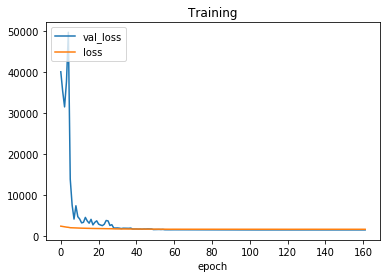

In [6]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

lr   :  [5e-07, 5e-07, 5e-07, 5e-07]


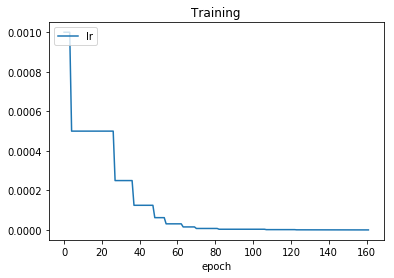

In [7]:
PlotHistory(model.history.history,listKeys=['lr'])

val_acc_pred   :  [0.9443258159955342, 0.9443481423060099, 0.9443549909591675, 0.9443128080368042]
acc_pred   :  [0.9369025650024414, 0.9368853427342007, 0.9370091347694397, 0.9369164028848921]


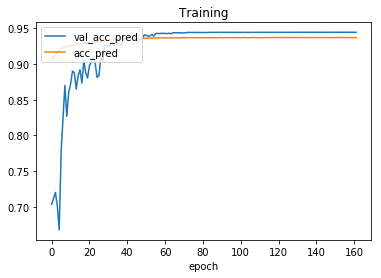

In [8]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

# Evaluate Model with Test dataset 

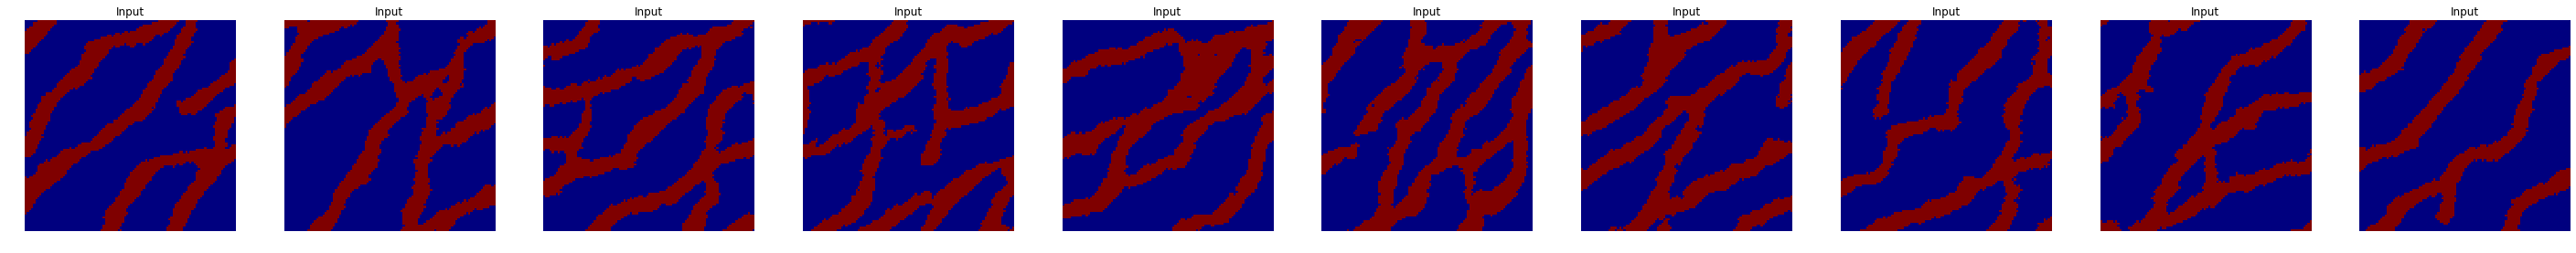

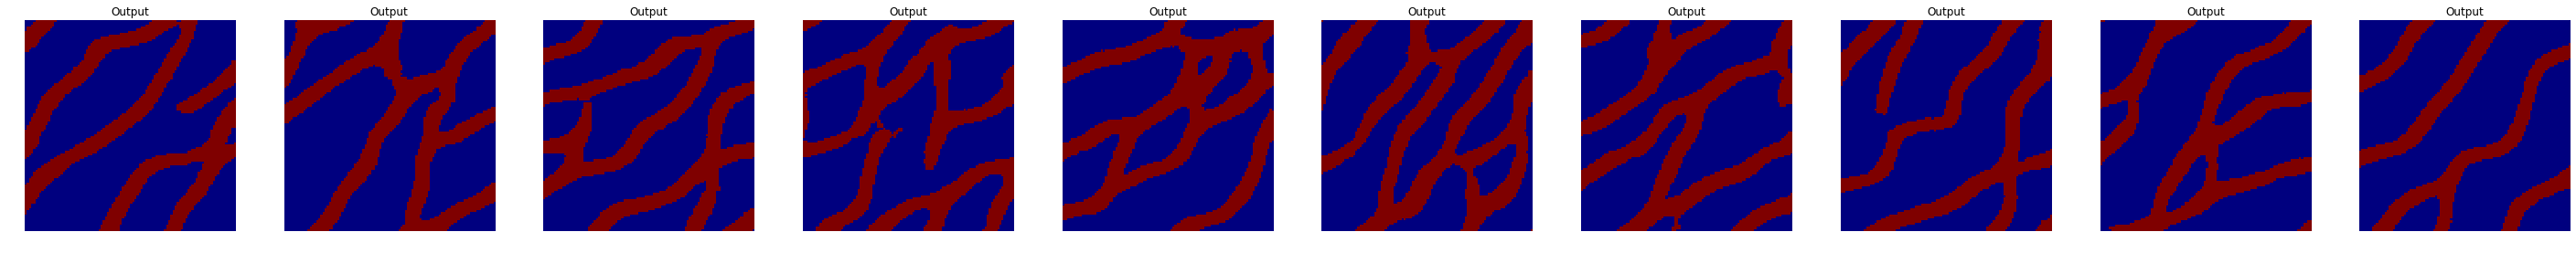

In [9]:
if load_tfrecords:
    x_test = gen_test.get_numpy_batch()

x_rec = model.model.predict(x_test)
PlotDataAE(np.argmax(x_test[:,:,:,:],axis=-1),np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=(100,100))

# Generate random sampling

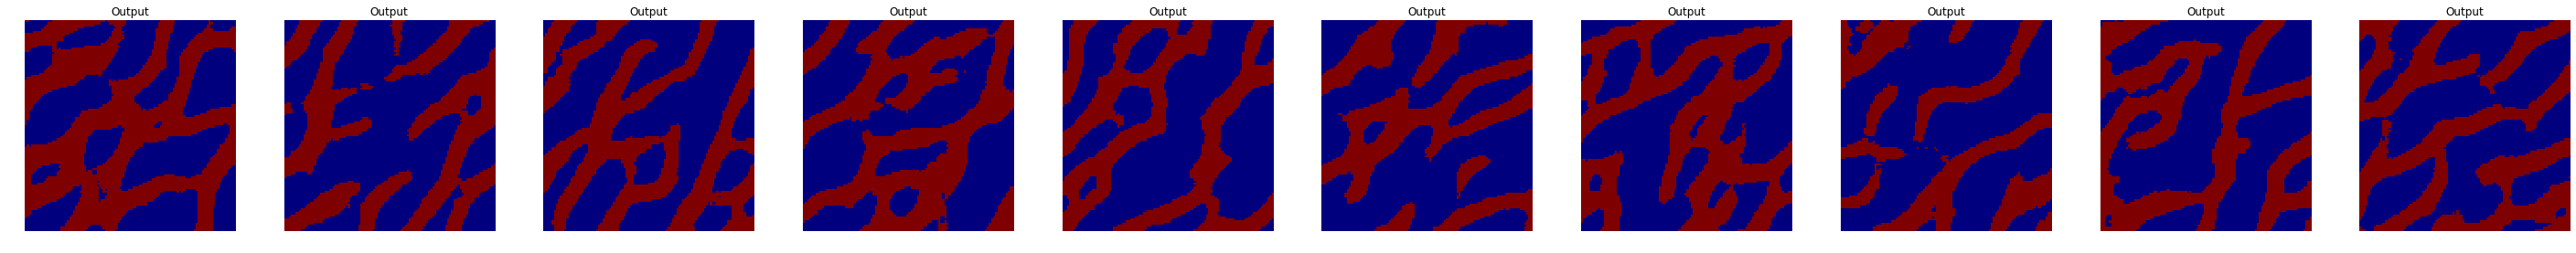

In [10]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],Only_Result=False,digit_size=(100,100))